In [64]:
#mancano la parte di calcolo delle concentrazioni giuste
#mancano tutte le considerazioni sugli errori


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
import plotly.graph_objects as go
import pandas as pd


In [66]:
V_i = [1500.1, 1502.8, 1510, 1502.1, 1497, 1504.4, 1511, 1554, 1513, 1512, 1543]
V_B = [1513.4, 1497.5, 1514, 1534.1, 1504, 1518, 1507.1, 1550, 1504, 1514.8, 1545.4]
V_f = [v_i + v_b for v_i, v_b in zip(V_i, V_B)]
C_i = [58.195]  # micromolare
C_f = []

def calculate_C_f(V_i, V_f, C_i):
    return C_i * V_i / V_f

# Calcola le concentrazioni finali 
for i in range(len(V_i)):
    if i == 0:
        C_f_value = calculate_C_f(V_i[i], V_f[i], C_i[0])
    else:
        C_f_value = calculate_C_f(V_i[i], V_f[i], C_f_value)
    C_f.append(C_f_value)


C_f_reale = C_f[2:]
print(C_f_reale)
#concentration = [7.5, 3.75, 1.125, 0.5, 0.25, 0.1, 0.05, 0.025, 0.00125]


[7.245466497324707, 3.5845514872641604, 1.7880951604246744, 0.8900246027471149, 0.44558734791785914, 0.22308077920887665, 0.11187312527114032, 0.05588481743424216, 0.027920694631859748]


In [67]:
# Lista delle colonne da leggere per ogni concentrazione
columns = [
    (0, 1), (2, 3), (4, 5), (6, 7), (8, 9), (10, 11), (12, 13), (14, 15), (16, 17), (18, 19)
]

wavelengths = []
intensities = []

# Ciclo per leggere i dati da ciascuna coppia di colonne
for col_pair in columns:
    data = pd.read_csv(
        'concentrazioni.csv',
        header=1,
        usecols=col_pair,
        names=['Lughezza donda', 'Intensità'],
        sep=',',
        decimal='.',
        skipinitialspace=True,
        nrows=291
    )
    wavelengths.append(data['Lughezza donda'])
    intensities.append(data['Intensità'])

# Assegna i dati alle variabili corrispondenti
Wavelength_75, Wavelength_375, Wavelength_1125, Wavelength_05, Wavelength_025, Wavelength_01, Wavelength_005, Wavelength_0025, Wavelength_000125, Wavelength_fondo = wavelengths
Intensity_75, Intensity_375, Intensity_1125, Intensity_05, Intensity_025, Intensity_01, Intensity_005, Intensity_0025, Intensity_000125, Intensity_fondo = intensities


In [68]:
# Sottrazione del fondo da ogni coppia di Wavelength e Intensity
corrected_intensities1 = []

for intensity, fondo in zip(intensities, Intensity_fondo):
    corrected_intensity1 = intensity - fondo
    corrected_intensities1.append(corrected_intensity1)

    # Crea un DataFrame Pandas con i valori corretti
    df_corrected = pd.DataFrame(corrected_intensities1).transpose()
    # Define labels if not already defined
    if 'labels' not in locals():
        labels = [f"{value:.3g}" for value in C_f_reale[:-1]]  # Adjust based on the context of C_f_reale



In [69]:
 # Stampa la tabella
df_corrected_no_fondo = df_corrected.iloc[:, :-1]  # Rimuove l'ultima colonna che rappresenta il fondo
display(df_corrected_no_fondo)

,Intensità,Intensità,Intensità,Intensità,Intensità,Intensità,Intensità,Intensità,Intensità
0,3.500750,1.707255,2.343808,0.972800,2.160814,0.584602,0.447152,1.056590,1.329357
1,3.497508,1.679802,2.724172,1.574643,2.345600,0.705614,0.689525,0.718705,1.511142
2,3.608907,1.301299,2.112738,1.012408,2.218534,0.807022,0.610374,1.041281,1.423399
3,3.489175,1.347922,2.294178,1.000743,1.700895,0.275808,0.423534,1.011592,1.201461
4,3.264441,1.181034,2.167069,0.893306,1.376085,0.535782,0.322637,0.956263,0.647406
...,...,...,...,...,...,...,...,...,...
286,9.478392,7.352423,4.840966,2.560408,1.242702,0.606053,1.003869,0.238039,0.660963
287,9.006232,8.008359,4.457921,2.644195,1.205572,0.814538,1.127172,0.709681,0.612747
288,8.845861,7.286301,4.794618,2.339236,0.717757,0.466159,0.983141,0.506918,0.752407
289,8.598531,7.138248,4.537270,2.363506,1.180928,0.788421,1.202718,0.824096,0.596066


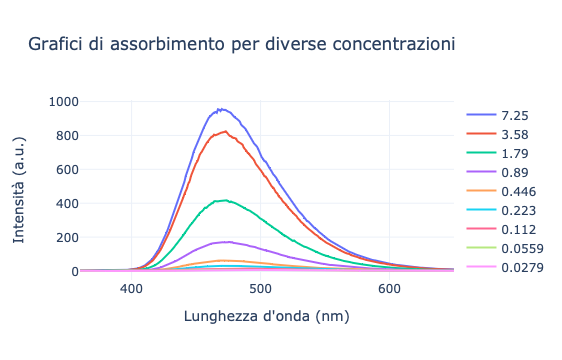

In [70]:
#le code sono spaiate da 0 a 10

fig = go.Figure()

# Aggiungi le tracce per ogni concentrazione usando un ciclo
wavelengths = [Wavelength_75, Wavelength_375, Wavelength_1125, Wavelength_05, Wavelength_025, Wavelength_01, Wavelength_005, Wavelength_0025, Wavelength_000125]
corrected_intensities1 = [Intensity_75, Intensity_375, Intensity_1125, Intensity_05, Intensity_025, Intensity_01, Intensity_005, Intensity_0025, Intensity_000125]
labels = [f"{value:.3g}" for value in C_f_reale]

for wavelength,  corrected_intensities1, label in zip(wavelengths,  corrected_intensities1, labels):
    fig.add_trace(go.Scatter(x=wavelength, y= corrected_intensities1, mode='lines', name=label))

# Aggiungi titolo e etichette degli assi
fig.update_layout(
    title='Grafici di assorbimento per diverse concentrazioni',
    xaxis_title='Lunghezza d\'onda (nm)',
    yaxis_title='Intensità (a.u.)',
    template='plotly_white'
)

# Mostra il grafico
fig.show()

In [71]:
# Sottrazione del fondo da ogni coppia di intensità # Dovrebbe corrispondere al numero di concentrazioni
#print(corrected_intensities1)

Offset: [2.55358611e+00 8.38833168e-01 8.48759569e-01 5.59653796e-01
 4.21835527e-01 4.47418765e-02 1.89250115e-01 4.14598770e-04
 0.00000000e+00]
Adjusting the number of labels to match the columns in df_corrected_no_fondo.


,7.25,3.58,1.79,0.89,0.446,0.223,0.112,0.0559,0.0279
0,-1.956325,-3.749819,-3.113267,-4.484275,-3.296261,-4.872473,-5.009923,-4.400485,-4.127718
1,-1.959567,-3.777273,-2.732903,-3.882432,-3.111474,-4.751461,-4.767550,-4.738370,-3.945933
2,-1.848168,-4.155776,-3.344337,-4.444667,-3.238540,-4.650053,-4.846701,-4.415794,-4.033676
3,-1.967900,-4.109153,-3.162897,-4.456332,-3.756180,-5.181267,-5.033540,-4.445482,-4.255614
4,-2.192633,-4.276041,-3.290005,-4.563769,-4.080989,-4.921292,-5.134438,-4.500812,-4.809669
...,...,...,...,...,...,...,...,...,...
286,4.021317,1.895348,-0.616108,-2.896667,-4.214373,-4.851022,-4.453206,-5.219035,-4.796112
287,3.549158,2.551284,-0.999153,-2.812880,-4.251503,-4.642537,-4.329903,-4.747394,-4.844328
288,3.388786,1.829226,-0.662457,-3.117838,-4.739318,-4.990916,-4.473934,-4.950156,-4.704668
289,3.141456,1.681173,-0.919805,-3.093568,-4.276147,-4.668653,-4.254357,-4.632979,-4.861008


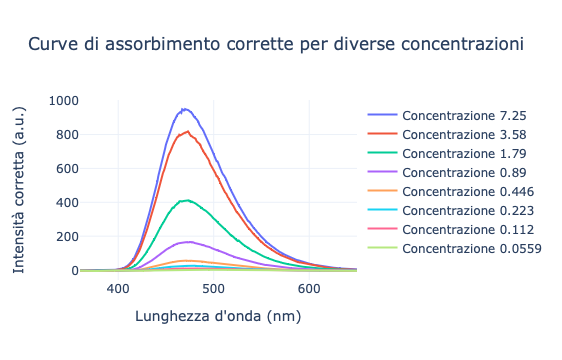

In [72]:
# Accoppio le code e creo un dataframe con i dati aggiornati
minimi = np.array([df_corrected_no_fondo.iloc[:, col].min() for col in range(df_corrected_no_fondo.shape[1])])
min_minimo = min(minimi)
offset = minimi - min_minimo  # Calculate the offset for each column
print("Offset:", offset)
for idx, col in enumerate(df_corrected_no_fondo.columns):
    df_corrected_no_fondo[col] = df_corrected_no_fondo[col] - offset[idx]

# Ensure the number of columns in df_corrected_no_fondo matches the number of labels
if df_corrected_no_fondo.shape[1] != len(labels[:-1]):
    print(f"Adjusting the number of labels to match the columns in df_corrected_no_fondo.")
    labels = labels[:df_corrected_no_fondo.shape[1]]  # Adjust labels to match the number of columns

# Crea una tabella Pandas con i valori corretti
df_corrected_table = pd.DataFrame(df_corrected_no_fondo.values, columns=labels)  # Use adjusted labels
display(df_corrected_table)

fig = go.Figure()

# Aggiungi le tracce per ogni colonna del dataframe corretto
for col, label in zip(df_corrected_table.columns, labels[:-1]):  # Exclude the last label as it corresponds to the background
    fig.add_trace(go.Scatter(x=wavelengths[0], y=df_corrected_table[col], mode='lines', name=f'Concentrazione {label}'))

# Aggiungi titolo e etichette degli assi
fig.update_layout(
    title='Curve di assorbimento corrette per diverse concentrazioni',
    xaxis_title='Lunghezza d\'onda (nm)',
    yaxis_title='Intensità corretta (a.u.)',
    template='plotly_white'
)

# Mostra il grafico
fig.show()

In [73]:
print(df_corrected_table)

         7.25      3.58      1.79      0.89     0.446     0.223     0.112  \
0   -1.956325 -3.749819 -3.113267 -4.484275 -3.296261 -4.872473 -5.009923   
1   -1.959567 -3.777273 -2.732903 -3.882432 -3.111474 -4.751461 -4.767550   
2   -1.848168 -4.155776 -3.344337 -4.444667 -3.238540 -4.650053 -4.846701   
3   -1.967900 -4.109153 -3.162897 -4.456332 -3.756180 -5.181267 -5.033540   
4   -2.192633 -4.276041 -3.290005 -4.563769 -4.080989 -4.921292 -5.134438   
..        ...       ...       ...       ...       ...       ...       ...   
286  4.021317  1.895348 -0.616108 -2.896667 -4.214373 -4.851022 -4.453206   
287  3.549158  2.551284 -0.999153 -2.812880 -4.251503 -4.642537 -4.329903   
288  3.388786  1.829226 -0.662457 -3.117838 -4.739318 -4.990916 -4.473934   
289  3.141456  1.681173 -0.919805 -3.093568 -4.276147 -4.668653 -4.254357   
290  4.009130  0.926533 -1.418446 -3.252439 -4.452251 -4.842207 -4.288356   

       0.0559    0.0279  
0   -4.400485 -4.127718  
1   -4.738370 -3.945933

In [74]:
# making maximum point interpolation:
def max_fit_parabolic(x, λcenter, a, IMAX): # -a*(x-λcenter)**2 + IMAX
    return -a*(x-λcenter)**2 + IMAX

concentration = [7.5, 3.75, 1.125, 0.5, 0.25, 0.1, 0.05, 0.025, 0.00125]


In [75]:
'''''
# Use curve fitting to find the optimal parameters λcenter, a, IMAX
params, params_covariance = curve_fit(max_fit_parabolic,Wavelength_75, Intensity_75, p0=[3, 1, 9])

# Extract the fitted parameters
λcenter_fit, a_fit, IMAX_fit = params

print("Fitted parameters:")
print(f"λcenter = {λcenter_fit}")
print(f"a = {a_fit}")
print(f"IMAX = {IMAX_fit}")

# Plot the data and the fitted curve
plt.scatter(Wavelength_75, Intensity_75, label='Data')
x_fit = np.linspace(min(Wavelength_75), max(Wavelength_75), 100)
y_fit = max_fit_parabolic(x_fit, *params)
plt.plot(Wavelength_75, Intensity_75, label='Fitted curve', color='red')
plt.legend()
plt.show()
'''''

'\'\'\n# Use curve fitting to find the optimal parameters λcenter, a, IMAX\nparams, params_covariance = curve_fit(max_fit_parabolic,Wavelength_75, Intensity_75, p0=[3, 1, 9])\n\n# Extract the fitted parameters\nλcenter_fit, a_fit, IMAX_fit = params\n\nprint("Fitted parameters:")\nprint(f"λcenter = {λcenter_fit}")\nprint(f"a = {a_fit}")\nprint(f"IMAX = {IMAX_fit}")\n\n# Plot the data and the fitted curve\nplt.scatter(Wavelength_75, Intensity_75, label=\'Data\')\nx_fit = np.linspace(min(Wavelength_75), max(Wavelength_75), 100)\ny_fit = max_fit_parabolic(x_fit, *params)\nplt.plot(Wavelength_75, Intensity_75, label=\'Fitted curve\', color=\'red\')\nplt.legend()\nplt.show()\n'

In [76]:

data_sets = [
    (Wavelength_75, Intensity_75), 
    (Wavelength_375, Intensity_375),  
    (Wavelength_1125, Intensity_1125),
    (Wavelength_05, Intensity_05),
    (Wavelength_025, Intensity_025),
    (Wavelength_01, Intensity_01),
    (Wavelength_005, Intensity_005),
    (Wavelength_0025, Intensity_0025),
    (Wavelength_000125, Intensity_000125) 
]

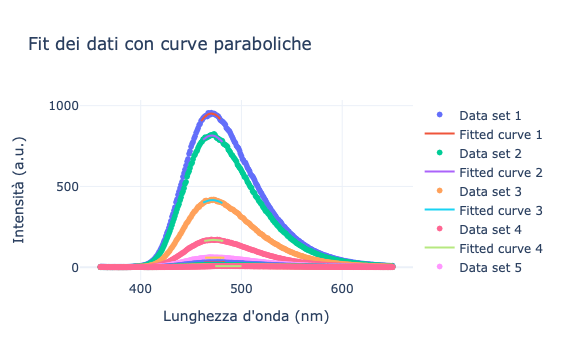

Concentrazione 7.25 - λcenter: 470.11, a: 0.46, IMAX: 951.86
Concentrazione 3.58 - λcenter: 470.48, a: 0.37, IMAX: 816.00
Concentrazione 1.79 - λcenter: 471.01, a: 0.19, IMAX: 416.01
Concentrazione 0.89 - λcenter: 472.49, a: 0.07, IMAX: 169.70
Concentrazione 0.446 - λcenter: 472.24, a: 0.02, IMAX: 61.04
Concentrazione 0.223 - λcenter: 475.07, a: 0.01, IMAX: 30.64
Concentrazione 0.112 - λcenter: 477.79, a: 0.00, IMAX: 14.90
Concentrazione 0.0559 - λcenter: 360.00, a: 0.00, IMAX: 7.69
Concentrazione 0.0279 - λcenter: 360.00, a: 0.00, IMAX: 7.10


In [77]:
#le code sono spagliate da 0 a 10


IMAX_values = []
# Funzione per fare il fit con i 10 valori più vicini al massimo
def fit_closest_to_max(x_data, y_data, num_points=20):
    max_index = np.argmax(y_data)
    max_intensity = y_data[max_index]
    distances = np.abs(y_data - max_intensity)
    closest_indices = np.argsort(distances)[:num_points]
    x_closest = x_data[closest_indices]
    y_closest = y_data[closest_indices]
    initial_lambda_center = x_data[max_index]
    initial_a = 1
    initial_IMAX = max_intensity
    bounds = ([min(x_data), 0, 0], [max(x_data), np.inf, max_intensity * 1.1])

    try:
        params, _ = curve_fit(max_fit_parabolic, x_closest, y_closest, 
                              p0=[initial_lambda_center, initial_a, initial_IMAX], bounds=bounds)
    except RuntimeError as e:
        print(f"Errore nel fitting per il set di dati: {e}")
        params = [np.nan, np.nan, np.nan]
    
    return params

fit_results = []
fig = go.Figure()

# Ciclo su ogni set di dati e fai il fit
for i, (x_data, y_data) in enumerate(data_sets):
    params = fit_closest_to_max(x_data, y_data, num_points=20)
    λcenter_fit, a_fit, IMAX_fit = params
    fit_results.append({
        'set': i+1,
        'λcenter': λcenter_fit,
        'a': a_fit,
        'IMAX': IMAX_fit
    })
    IMAX_values.append(IMAX_fit)
    
    max_index = np.argmax(y_data)
    max_intensity = y_data[max_index]
    distances = np.abs(y_data - max_intensity)
    closest_indices = np.argsort(distances)[:20]
    x_closest = x_data[closest_indices]
    y_closest = y_data[closest_indices]
    x_fit = np.linspace(min(x_closest), max(x_closest), 100)
    y_fit = max_fit_parabolic(x_fit, *params)
    
    # Aggiungi i dati e la curva di fit al grafico
    fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='markers', name=f'Data set {i+1}'))
    fig.add_trace(go.Scatter(x=x_fit, y=y_fit, mode='lines', name=f'Fitted curve {i+1}'))

# Configura il layout del grafico
fig.update_layout(
    title='Fit dei dati con curve paraboliche',
    xaxis_title='Lunghezza d\'onda (nm)',
    yaxis_title='Intensità (a.u.)',
    template='plotly_white'
)

# Mostra il grafico
fig.show()

# Stampa i risultati di adattamento per ogni set
for result, label in zip(fit_results, labels):
    print(f"Concentrazione {label} - λcenter: {result['λcenter']:.2f}, a: {result['a']:.2f}, IMAX: {result['IMAX']:.2f}")


In [78]:
print(IMAX_values)


[951.8625959917059, 815.9960241969852, 416.00992305532105, 169.7015896250111, 61.03916446142523, 30.64014187473981, 14.89865399723263, 7.69017212943347, 7.101466158868659]


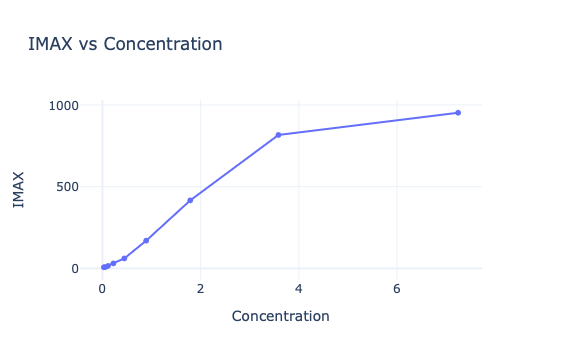

In [79]:
concentration = [7.5, 3.75, 1.125, 0.5, 0.25, 0.1, 0.05, 0.025, 0.00125]
fig = go.Figure()
fig.add_trace(go.Scatter(x=C_f_reale, y=IMAX_values, mode='lines+markers', name='IMAX vs Concentration'))
fig.update_layout(
    title='IMAX vs Concentration',
    xaxis_title='Concentration',
    yaxis_title='IMAX',
    template='plotly_white'
)
fig.show()

In [80]:
I0 = IMAX_values[8]
Cans = 0.000005

def funzione_binding(P, Δη, n, KD):
    par = n*P-Cans+KD
    sqrt = np.sqrt(par**2 - (4 * P * n * Cans))
    return (Δη/2) * (par-sqrt) + I0

In [81]:
print(IMAX_values[8])

7.101466158868659


Δη: 3.61e+08 ± 1.06e+08
n: 7.07e-01 ± 2.31e+00
KD: 4.16e+00 ± 1.27e+01


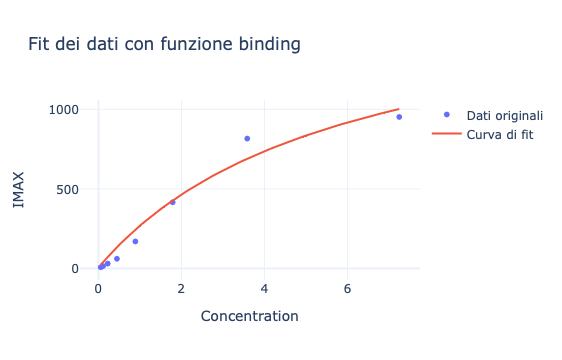

  Parameter         Value
0        Δη  3.605157e+08
1         n  7.069514e-01
2        KD  4.159390e+00


In [82]:
# Rimuovere l'ultimo valore da concentration e IMAX_values
P = C_f_reale[:-1]
y = IMAX_values[:-1]

# Esegui il fit con curve_fit
initial_params = [max(y), 3, np.median(P)]  # Δη = max(y), n = 1, KD = valore mediano di P
popt, pcov = curve_fit(funzione_binding, P, y, p0=initial_params)

# Parametri ottimizzati
Δη_fit, n_fit, KD_fit = popt
# Calcola gli errori sui parametri del fit
errors = np.sqrt(np.diag(pcov))
error_Δη, error_n, error_KD = errors

# Stampa gli errori
print(f"Δη: {Δη_fit:.2e} ± {error_Δη:.2e}")
print(f"n: {n_fit:.2e} ± {error_n:.2e}")
print(f"KD: {KD_fit:.2e} ± {error_KD:.2e}")

# Crea un array di valori per P per il grafico del fit
P_fit = np.linspace(min(P), max(P), 100)
y_fit = funzione_binding(P_fit, Δη_fit, n_fit, KD_fit)

# Crea il grafico con Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=P, y=y, mode='markers', name='Dati originali'))
fig.add_trace(go.Scatter(x=P_fit, y=y_fit, mode='lines', name='Curva di fit'))
fig.update_layout(
    title='Fit dei dati con funzione binding',
    xaxis_title='Concentration',
    yaxis_title='IMAX',
    template='plotly_white'
)
fig.show()

# Crea un DataFrame Pandas con i risultati del fit
fit_results_df = pd.DataFrame({
    'Parameter': ['Δη', 'n', 'KD'],
    'Value': [Δη_fit, n_fit, KD_fit]
})
print(fit_results_df)

## PROVA


In [84]:
C_f_reale=[29.58,14.78,7.42,3.71,1.85,0.92,0.46,0.23,0.11,0]

# Lista delle colonne da leggere per ogni concentrazione
columns = [
    (0, 1), (2, 3), (4, 5), (6, 7), (8, 9), (10, 11), (12, 13), (14, 15), (16, 17), (18, 19)
]

wavelengths = []
intensities = []

# Ciclo per leggere i dati da ciascuna coppia di colonne
for col_pair in columns:
    data = pd.read_csv(
        'prova.csv',
        header=1,
        usecols=col_pair,
        names=['Lughezza donda', 'Intensità'],
        sep=',',
        decimal='.',
        skipinitialspace=True,
        nrows=291
    )
    wavelengths.append(data['Lughezza donda'])
    intensities.append(data['Intensità'])

# Assegna i dati alle variabili corrispondenti
Wavelength_30, Wavelength_15, Wavelength_7, Wavelength_4, Wavelength_2, Wavelength_1, Wavelength_05, Wavelength_02, Wavelength_01, Wavelength_fondo = wavelengths
Intensity_30, Intensity_15, Intensity_7, Intensity_4, Intensity_2, Intensity_1, Intensity_05, Intensity_02, Intensity_01, Intensity_fondo = intensities


In [85]:
# Sottrazione del fondo da ogni coppia di Wavelength e Intensity
corrected_intensities = []

for intensity, fondo in zip(intensities, Intensity_fondo):
    corrected_intensity = intensity - fondo
    corrected_intensities.append(corrected_intensity)

# Ora corrected_intensities contiene le intensità corrette per ogni coppia

# Calcola la lunghezza degli array intensities e wavelengths
length_intensities = len(corrected_intensities)
length_wavelengths = len(wavelengths)

print(f"Lunghezza di intensities: {length_intensities}")
print(f"Lunghezza di wavelengths: {length_wavelengths}")

Lunghezza di intensities: 10
Lunghezza di wavelengths: 10


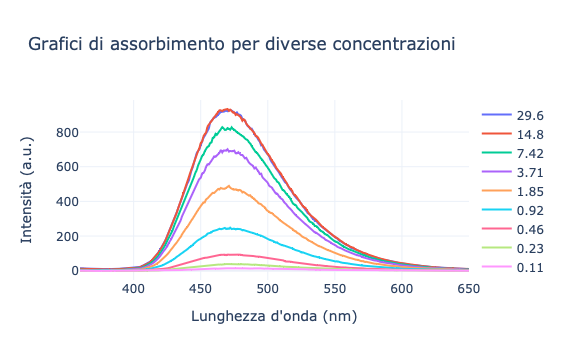

In [86]:
#le code sono spaiate da 0 a 10

fig = go.Figure()

# Aggiungi le tracce per ogni concentrazione usando un ciclo
wavelengths = [Wavelength_30, Wavelength_15, Wavelength_7, Wavelength_4, Wavelength_2, Wavelength_1, Wavelength_05, Wavelength_02, Wavelength_01]
intensities = [Intensity_30, Intensity_15, Intensity_7, Intensity_4, Intensity_2, Intensity_1, Intensity_05, Intensity_02, Intensity_01]
labels = [f"{value:.3g}" for value in C_f_reale]

for wavelength,  corrected_intensities, label in zip(wavelengths,  corrected_intensities, labels):
    fig.add_trace(go.Scatter(x=wavelength, y= corrected_intensities, mode='lines', name=label))

# Aggiungi titolo e etichette degli assi
fig.update_layout(
    title='Grafici di assorbimento per diverse concentrazioni',
    xaxis_title='Lunghezza d\'onda (nm)',
    yaxis_title='Intensità (a.u.)',
    template='plotly_white'
)

# Mostra il grafico
fig.show()

In [87]:
# making maximum point interpolation:
def max_fit_parabolic(x, λcenter, a, IMAX): # -a*(x-λcenter)**2 + IMAX
    return -a*(x-λcenter)**2 + IMAX

In [88]:

data_sets = [
    (Wavelength_30, Intensity_30), 
    (Wavelength_15, Intensity_15),  
    (Wavelength_7, Intensity_7),
    (Wavelength_4, Intensity_4),
    (Wavelength_2, Intensity_2),
    (Wavelength_1, Intensity_1),
    (Wavelength_05, Intensity_05),
    (Wavelength_02, Intensity_02),
    (Wavelength_01, Intensity_01)
]

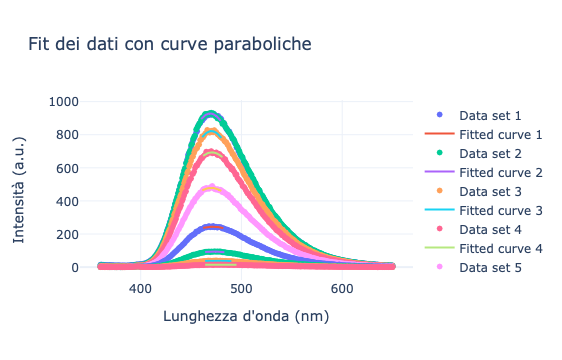

Concentrazione 29.6 - λcenter: 470.71, a: 0.38, IMAX: 924.20
Concentrazione 14.8 - λcenter: 469.00, a: 0.42, IMAX: 928.66
Concentrazione 7.42 - λcenter: 470.23, a: 0.44, IMAX: 822.51
Concentrazione 3.71 - λcenter: 470.71, a: 0.27, IMAX: 693.71
Concentrazione 1.85 - λcenter: 469.96, a: 0.19, IMAX: 478.98
Concentrazione 0.92 - λcenter: 471.48, a: 0.08, IMAX: 244.34
Concentrazione 0.46 - λcenter: 472.36, a: 0.03, IMAX: 94.04
Concentrazione 0.23 - λcenter: 474.45, a: 0.01, IMAX: 38.75
Concentrazione 0.11 - λcenter: 477.94, a: 0.00, IMAX: 14.83


In [89]:
#le code sono spagliate da 0 a 10


IMAX_values = []
# Funzione per fare il fit con i 10 valori più vicini al massimo
def fit_closest_to_max(x_data, y_data, num_points=20):
    max_index = np.argmax(y_data)
    max_intensity = y_data[max_index]
    distances = np.abs(y_data - max_intensity)
    closest_indices = np.argsort(distances)[:num_points]
    x_closest = x_data[closest_indices]
    y_closest = y_data[closest_indices]
    initial_lambda_center = x_data[max_index]
    initial_a = 1
    initial_IMAX = max_intensity
    bounds = ([min(x_data), 0, 0], [max(x_data), np.inf, max_intensity * 1.1])

    try:
        params, _ = curve_fit(max_fit_parabolic, x_closest, y_closest, 
                              p0=[initial_lambda_center, initial_a, initial_IMAX], bounds=bounds)
    except RuntimeError as e:
        print(f"Errore nel fitting per il set di dati: {e}")
        params = [np.nan, np.nan, np.nan]
    
    return params

fit_results = []
fig = go.Figure()

# Ciclo su ogni set di dati e fai il fit
for i, (x_data, y_data) in enumerate(data_sets):
    params = fit_closest_to_max(x_data, y_data, num_points=20)
    λcenter_fit, a_fit, IMAX_fit = params
    fit_results.append({
        'set': i+1,
        'λcenter': λcenter_fit,
        'a': a_fit,
        'IMAX': IMAX_fit
    })
    IMAX_values.append(IMAX_fit)
    
    max_index = np.argmax(y_data)
    max_intensity = y_data[max_index]
    distances = np.abs(y_data - max_intensity)
    closest_indices = np.argsort(distances)[:20]
    x_closest = x_data[closest_indices]
    y_closest = y_data[closest_indices]
    x_fit = np.linspace(min(x_closest), max(x_closest), 100)
    y_fit = max_fit_parabolic(x_fit, *params)
    
    # Aggiungi i dati e la curva di fit al grafico
    fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='markers', name=f'Data set {i+1}'))
    fig.add_trace(go.Scatter(x=x_fit, y=y_fit, mode='lines', name=f'Fitted curve {i+1}'))

# Configura il layout del grafico
fig.update_layout(
    title='Fit dei dati con curve paraboliche',
    xaxis_title='Lunghezza d\'onda (nm)',
    yaxis_title='Intensità (a.u.)',
    template='plotly_white'
)

# Mostra il grafico
fig.show()

# Stampa i risultati di adattamento per ogni set
for result, label in zip(fit_results, labels):
    print(f"Concentrazione {label} - λcenter: {result['λcenter']:.2f}, a: {result['a']:.2f}, IMAX: {result['IMAX']:.2f}")


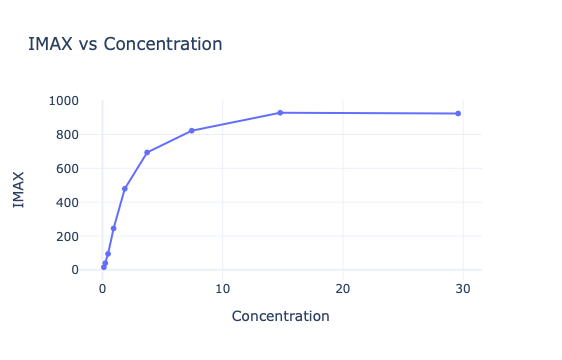

In [90]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=C_f_reale, y=IMAX_values, mode='lines+markers', name='IMAX vs Concentration'))
fig.update_layout(
    title='IMAX vs Concentration',
    xaxis_title='Concentration',
    yaxis_title='IMAX',
    template='plotly_white'
)
fig.show()

In [91]:
I0 = C_f_reale[9]
Cans = 0.000005

def funzione_binding(P, Δη, n, KD):
    par = n*P-Cans+KD
    sqrt = np.sqrt(par**2 - (4 * P * n * Cans))
    return (Δη/2) * (par-sqrt) + I0


In [92]:
print(C_f_reale[:-1])
print(IMAX_values)

[29.58, 14.78, 7.42, 3.71, 1.85, 0.92, 0.46, 0.23, 0.11]
[924.20304851915, 928.6635984593589, 822.513826265595, 693.7083293868371, 478.98112374775076, 244.34156842693176, 94.03763545632864, 38.75122915304435, 14.825264612404464]


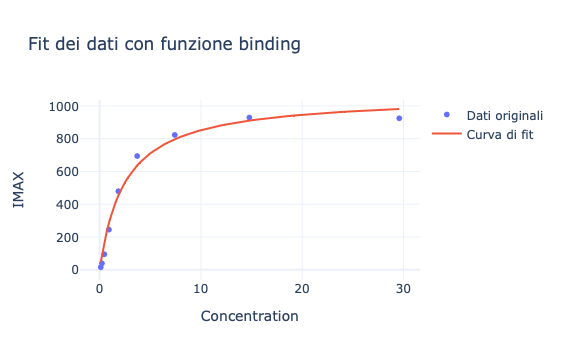

  Parameter         Value
0        Δη  2.127160e+08
1         n  1.095930e+00
2        KD  2.728975e+00


In [93]:
# Rimuovere l'ultimo valore da C_f_reale e IMAX_values per allineare le lunghezze
P = C_f_reale[:-1]
y = IMAX_values

# Esegui il fit con curve_fit
initial_params = [max(y), 3, np.median(P)]  # Δη = max(y), n = 1, KD = valore mediano di P
popt, pcov = curve_fit(funzione_binding, P, y, p0=initial_params)

# Parametri ottimizzati
Δη_fit, n_fit, KD_fit = popt

# Crea un array di valori per P per il grafico del fit
P_fit = np.linspace(min(P), max(P), 100)
y_fit = funzione_binding(P_fit, Δη_fit, n_fit, KD_fit)

# Crea il grafico con Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=P, y=y, mode='markers', name='Dati originali'))
fig.add_trace(go.Scatter(x=P_fit, y=y_fit, mode='lines', name='Curva di fit'))
fig.update_layout(
    title='Fit dei dati con funzione binding',
    xaxis_title='Concentration',
    yaxis_title='IMAX',
    template='plotly_white'
)
fig.show()

# Crea un DataFrame Pandas con i risultati del fit
fit_results_df = pd.DataFrame({
    'Parameter': ['Δη', 'n', 'KD'],
    'Value': [Δη_fit, n_fit, KD_fit]
})
print(fit_results_df)